In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv('D:\Datascience\shampoo\shampoo.csv')

In [3]:
data.shape

(37, 2)

In [4]:
data.tail()

,Month,Sales of shampoo over a three year period
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9
36,Sales of shampoo over a three year period,NaN


In [5]:
data=data.rename(columns={'Sales of shampoo over a three year period': 'Sales'}) # renaming the sales column

In [6]:
data=data.dropna(axis=0)

In [7]:
data.set_index('Month', inplace=True)

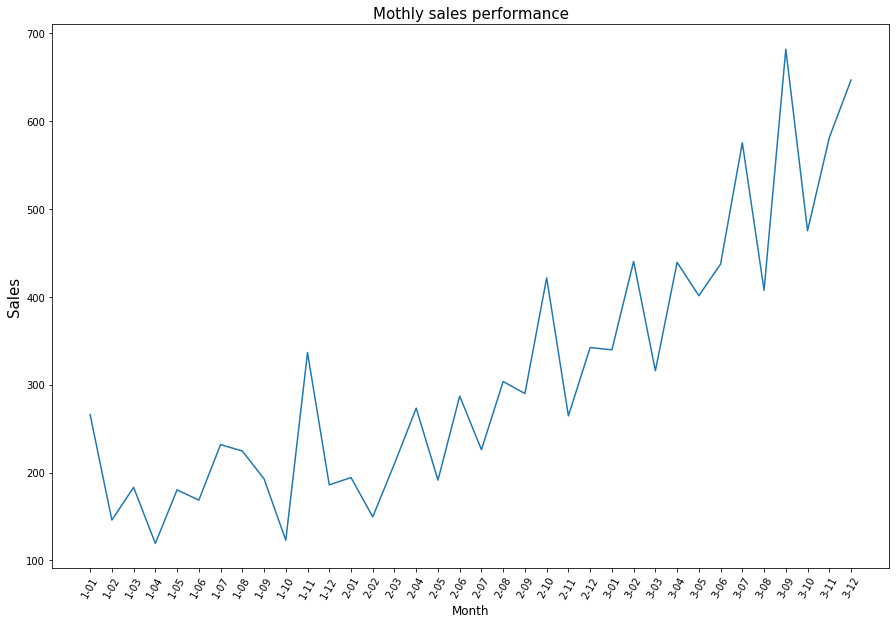

In [8]:
plt.figure(figsize=(15,10))
plt.plot(data)
plt.title('Mothly sales performance', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=60)
plt.show()


We see that the series is not stationary\
lets check the stationarity of the series.

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def test_stationary(data):
    #getting the rolling mean and the rolling std of the series
    roll_mean=data.rolling(5).mean()
    roll_std=data.rolling(5).std()   

    #plotting 
    plt.figure(figsize=(13,10))
    plt.plot(data, color='blue', label='Original_Series')
    plt.plot(roll_mean, color='red', label='Rolling mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.title('Original Series Vs. Rolling Mean and Rolling std')
    plt.xlabel('month')
    plt.ylabel('Sales Value')
    plt.xticks(rotation=60)
    plt.legend()
    plt.show()
    
    #Dickey fuller Test
    print("Dickey Fuller Test:")
    dftest = adfuller(data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('Critical values')
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    
   

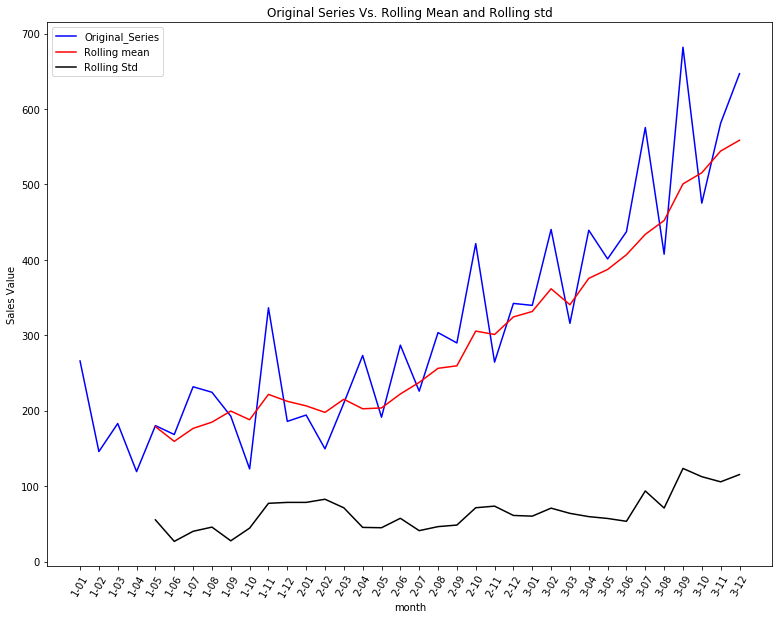

Dickey Fuller Test:
Critical values
Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [11]:
test_stationary(data['Sales'])

We see the time series is not stationarey the rolling mean is increasing also the standard deviation. The test statistic 3.06 ways higher than the critical value.

Log- Transform to make the series stationary

In [12]:
data_log=np.log(data)

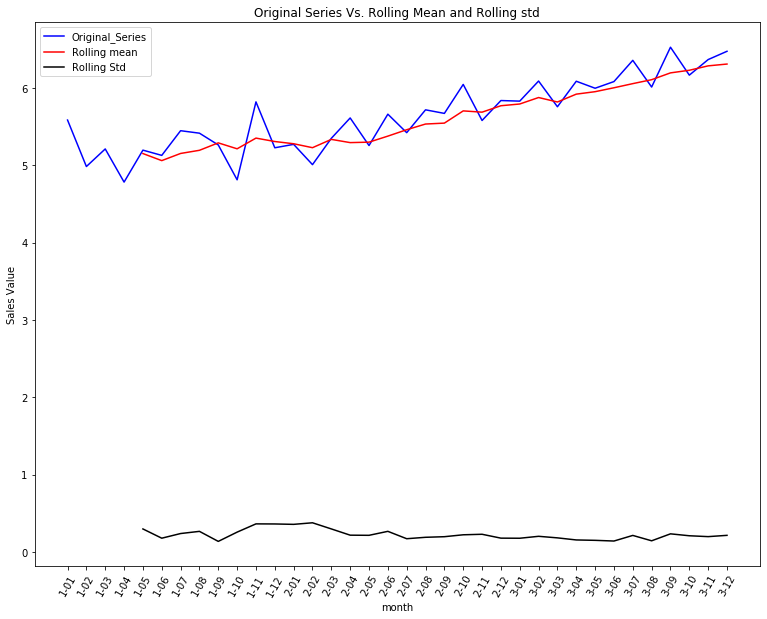

Dickey Fuller Test:
Critical values
Test Statistic                  1.798463
p-value                         0.998346
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [13]:
test_stationary(data_log['Sales'])

Moving Average

In [14]:
data_ma=data_log.rolling(7).mean()

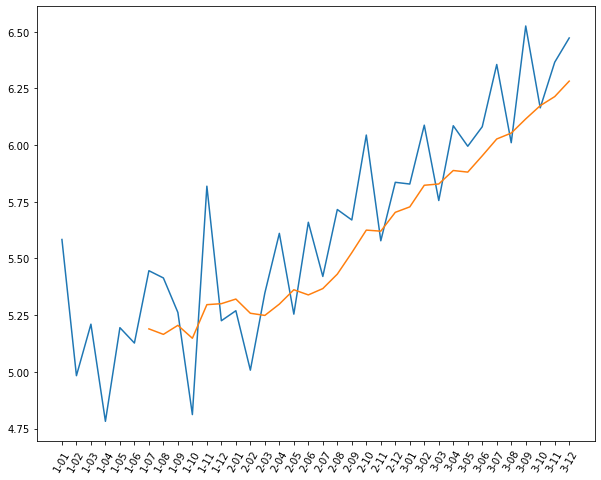

In [15]:
plt.figure(figsize=(10,8))
plt.plot(data_log)
plt.plot(data_ma)
plt.xticks(rotation=60)
plt.show()

In [16]:
datalog_diff=data_log-data_ma
datalog_diff.head()

,Sales
Month,
1-01,NaN
1-02,NaN
1-03,NaN
1-04,NaN
1-05,NaN


In [17]:
datalog_diff=datalog_diff.dropna()

In [18]:
datalog_diff.isnull().sum()

Sales    0
dtype: int64

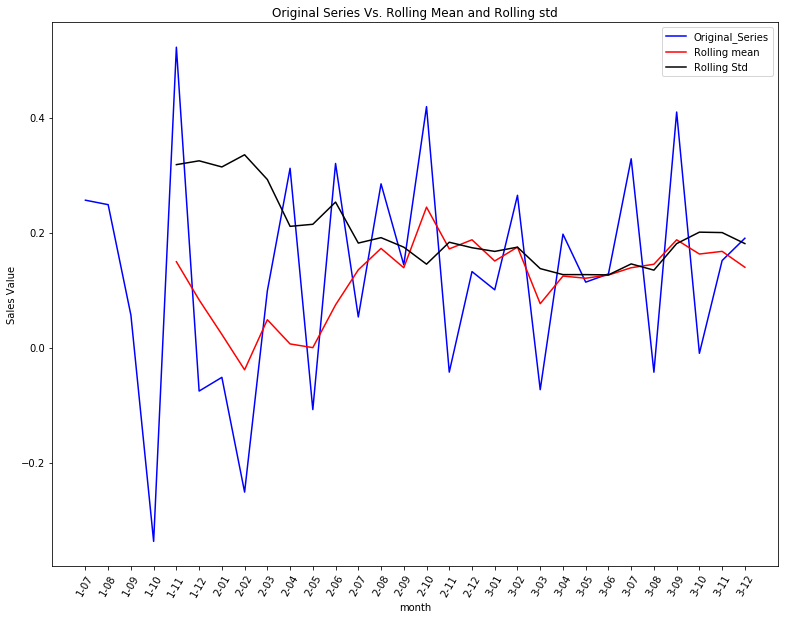

Dickey Fuller Test:
Critical values
Test Statistic                -7.909715e+00
p-value                        3.978079e-12
#Lags Used                     0.000000e+00
Number of Observations Used    2.900000e+01
Critical Value (1%)           -3.679060e+00
Critical Value (5%)           -2.967882e+00
Critical Value (10%)          -2.623158e+00
dtype: float64


In [19]:
test_stationary(datalog_diff['Sales'])

the Test statistics is less than 1% critical value.\
We can say that the series is stationary with 99% confidence\
Just to see, Lets try checking with exponential weighted moving agverage where the more weightage is given to the recent values

#### Exponenitial weighted moving average

In [20]:
data_ewma=data_log.ewm(halflife=1).mean()

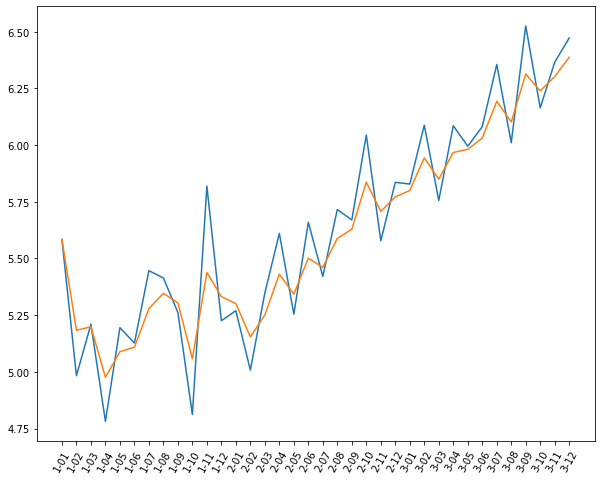

In [21]:
plt.figure(figsize=(10,8))
plt.plot(data_log)
plt.plot(data_ewma)
plt.xticks(rotation=60)
plt.show()

In [22]:
data_diff_ew=data_log-data_ewma

In [23]:
data_diff_ew.isnull().sum()

Sales    0
dtype: int64

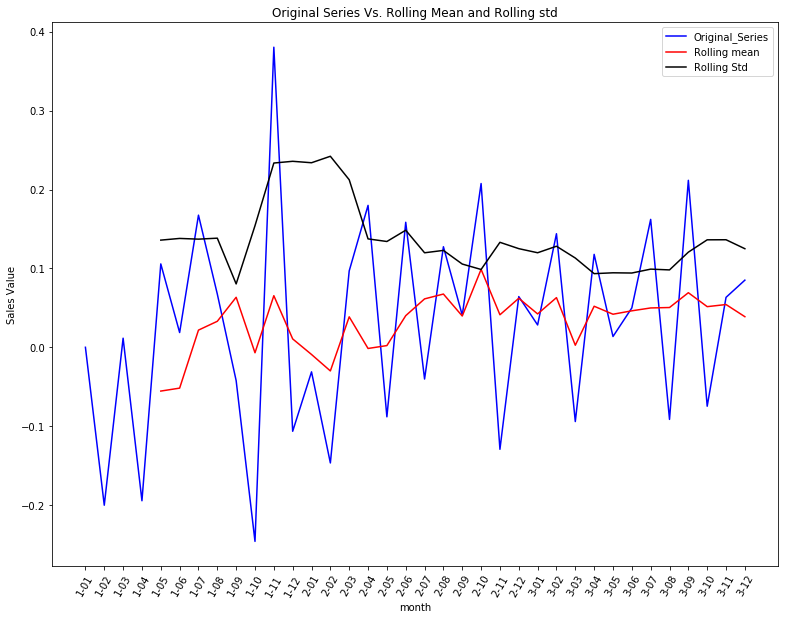

Dickey Fuller Test:
Critical values
Test Statistic                 -2.639697
p-value                         0.085067
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [24]:
test_stationary(data_diff_ew['Sales'])

ACF and PACF

In [25]:
from statsmodels.tsa.stattools import acf, pacf

In [26]:
lag_acf= acf(datalog_diff, nlags=25)
lag_pacf=pacf(datalog_diff, nlags=25, method='ols')

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


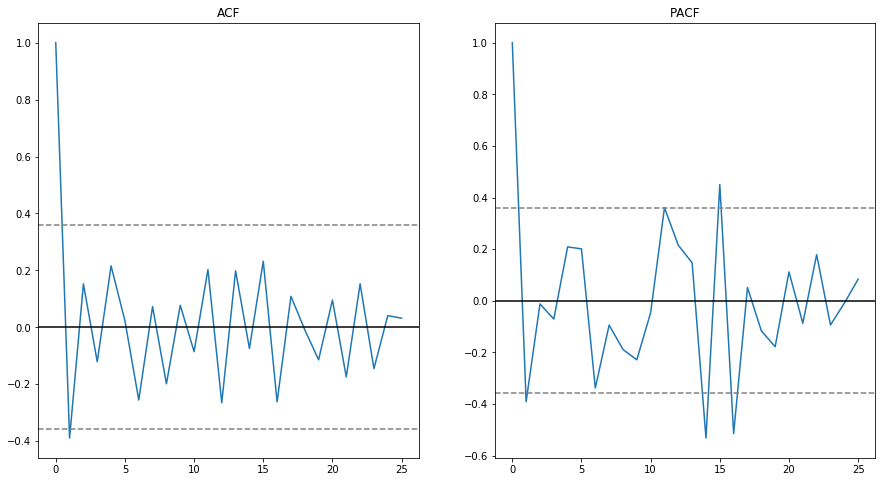

In [27]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(lag_acf)
plt.axhline(y=0, color='black')
plt.axhline(y=1.96/np.sqrt(len(datalog_diff)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datalog_diff)), linestyle='--', color='gray')
plt.title ('ACF')

plt.subplot(1,2,2)
plt.plot(lag_pacf)
plt.axhline(y=0, color='black')
plt.axhline(y=1.96/np.sqrt(len(datalog_diff)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datalog_diff)), linestyle='--', color='gray')
plt.title ('PACF')

plt.show()

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.\
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

In [28]:
datalog_shifted=datalog_diff-datalog_diff.shift()

In [29]:
datalog_shifted=datalog_shifted.dropna()

In [30]:
from statsmodels.tsa.arima_model import ARIMA

AR- time series model fiting

In [31]:
model=ARIMA(datalog_diff,order=(1,1,0))

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [32]:
model_fit=model.fit()

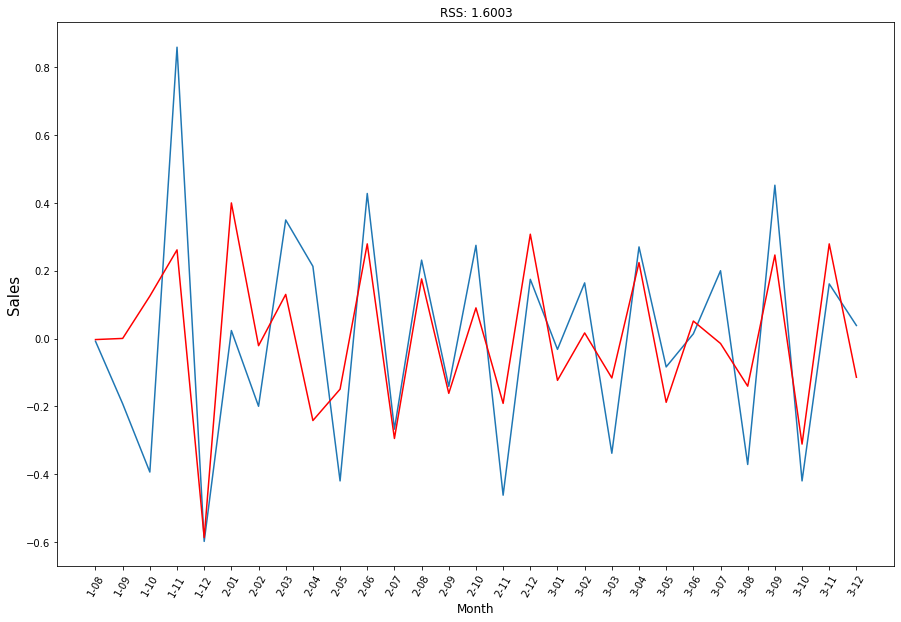

In [33]:
plt.figure(figsize=(15,10))
plt.plot(datalog_shifted)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-datalog_shifted['Sales'])**2))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=60)
plt.show()

MA : Model

In [34]:
model=ARIMA(datalog_diff,order=(0,1,1))
model_fit=model.fit()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


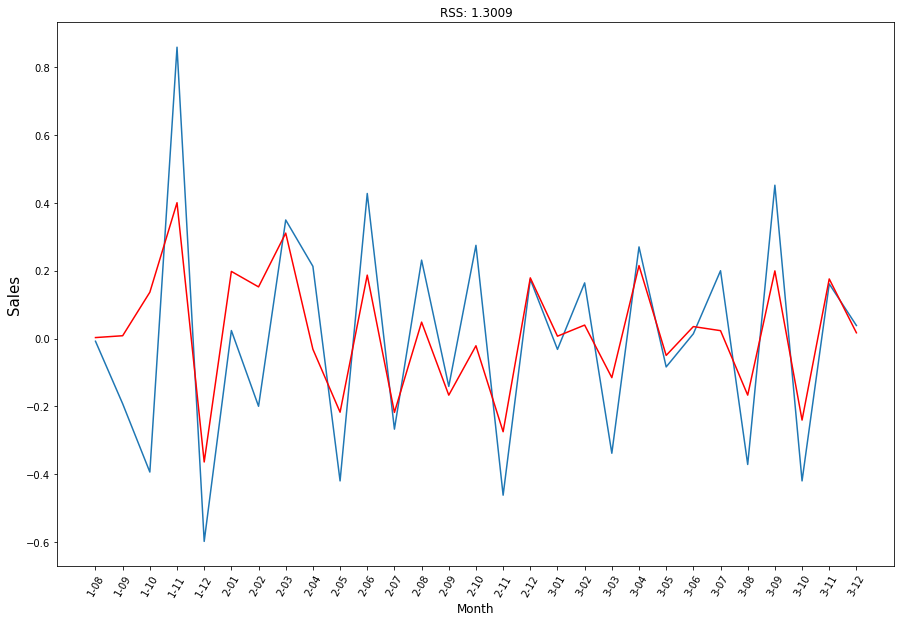

In [35]:
plt.figure(figsize=(15,10))
plt.plot(datalog_shifted)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-datalog_shifted['Sales'])**2))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=60)
plt.show()

ARIMA Model:

In [36]:
model=ARIMA(datalog_diff,order=(1,1,1))
model_fit=model.fit()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


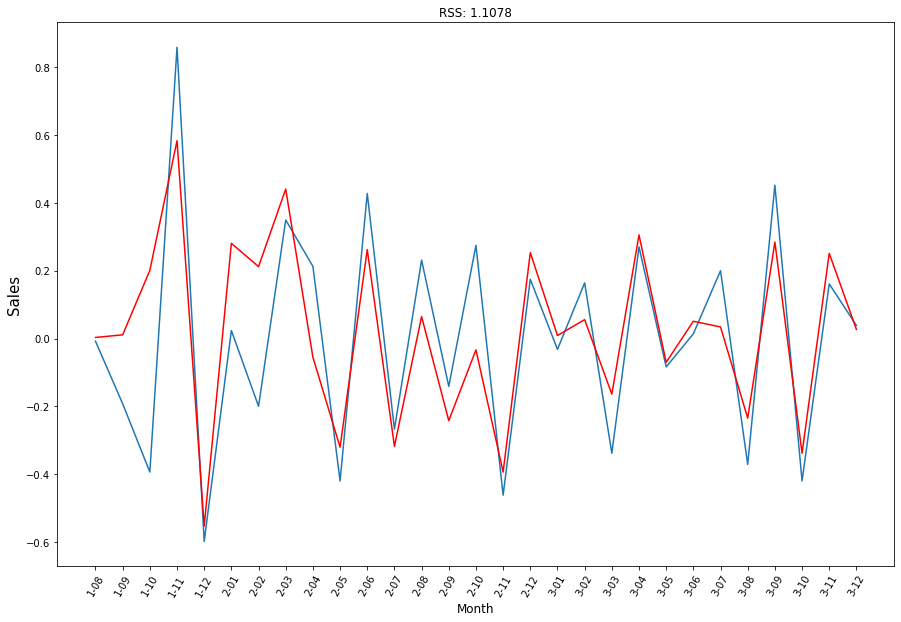

In [37]:
plt.figure(figsize=(15,10))
plt.plot(datalog_shifted)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-datalog_shifted['Sales'])**2))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=60)
plt.show()

In [40]:
Prediction_Arima_diff=pd.Series(model_fit.fittedvalues, copy=True)
Prediction_Arima_diff.head()

Month
1-08    0.003402
1-09    0.011223
1-10    0.201215
1-11    0.583380
1-12   -0.552687
dtype: float64

In [42]:
Prediction_Arima_cumsum=Prediction_Arima_diff.cumsum()
Prediction_Arima_cumsum.head()

Month
1-08    0.003402
1-09    0.014625
1-10    0.215841
1-11    0.799221
1-12    0.246534
dtype: float64

In [54]:
data_log[0:8]

,Sales
Month,
1-01,5.583496
1-02,4.982921
1-03,5.210032
1-04,4.781641
1-05,5.194622
1-06,5.126936
1-07,5.445875
1-08,5.413876


#                -----------------------Work in Progress--------------------

In [70]:
Prediction_Arima_log1=data_log[0:8]

In [71]:
Prediction_Arima_log=pd.concat([Prediction_Arima_log1, Prediction_Arima_cumsum])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [72]:
Prediction_Arima_log

,Sales,0
1-01,5.583496,NaN
1-02,4.982921,NaN
1-03,5.210032,NaN
1-04,4.781641,NaN
1-05,5.194622,NaN
1-06,5.126936,NaN
1-07,5.445875,NaN
1-08,5.413876,0.003402
1-09,NaN,0.014625
1-10,NaN,0.215841


In [ ]:
y_hat=model_fit.predict(30,40) 